In [1]:
import pandas as pd
import re
import os
import matplotlib.pyplot as plt

In [2]:
# Creating the DataFrame
eff_df = pd.DataFrame()

def extract_profiler_data(file_path):
    with open(file_path, 'r') as file:
        content = file.read()
    file_name = os.path.basename(file_path).replace('.txt', '')  
    text=content
    
    

    excl_pattern = re.compile(
        r"Name\s+NCalls\s+Excl\. Min\s+Excl\. Avg\s+Excl\. Max\s+Max %\n"
        r"-+\n"
        r"((?:.+\n)+)"
        r"-+", re.MULTILINE
    )
    excl_match = excl_pattern.search(content)
    excl_table_data = excl_match.group(1).strip() if excl_match else ""


    incl_pattern = re.compile(
        r"Name\s+NCalls\s+Incl\. Min\s+Incl\. Avg\s+Incl\. Max\s+Max %\n"
        r"-+\n"
        r"((?:.+\n)+)"
        r"-+", re.MULTILINE
    )
    incl_match = incl_pattern.search(content)
    incl_table_data = incl_match.group(1).strip() if incl_match else ""
    # print(incl_table_data)
    
    # Define the string to search for
    search_strings = ["KNAPSACK efficiency: ","SFC efficiency: ","SFC+painterPartition efficiency: "]
    
    
    
    knapsack_eff=''
    SFC_eff=''
    painter_eff=''


    for search_string in search_strings:
        # Find the index of the search string
        index = text.find(search_string)

        if index != -1:
            # Extract the value after the search string
            value = text[index + len(search_string):].split()[0]  # Get the next word
            # print("The value after '{}' is: {}".format(search_string.strip(), value))
            if(search_string=="KNAPSACK efficiency: "):
                knapsack_eff=value
                # i=i+1
            elif(search_string=="SFC efficiency: "):
                SFC_eff= value
            else:
                painter_eff=value

        else:
            print("String not found.")
    global eff_df
    new_row = {'Output': file_name, 'knapsack_eff': knapsack_eff, 'SFC_eff': SFC_eff,'painter_eff':painter_eff }
    eff_df = pd.concat([eff_df, pd.DataFrame([new_row])], ignore_index=True)
    # eff_df = eff_df.append(new_row, ignore_index=True)

    # Display the updated DataFrame
    # print(eff_df)
    def parse_table(table_data, columns):
        rows = table_data.strip().split("\n")
        data = []
        for row in rows:
            parts = re.split(r'\s{2,}', row.strip())
            data.append(dict(zip(columns, parts)))
        return data

    excl_columns = ['Name', 'NCalls', 'Excl. Min', 'Excl. Avg', 'Excl. Max', 'Max %']
    incl_columns = ['Name', 'NCalls', 'Incl. Min', 'Incl. Avg', 'Incl. Max', 'Max %']

    excl_data = parse_table(excl_table_data, excl_columns)
    incl_data = parse_table(incl_table_data, incl_columns)

    df_excl = pd.DataFrame(excl_data)
    df_incl = pd.DataFrame(incl_data)
    

    return df_excl, df_incl



In [3]:
def extract_from_multiple_files(files, output_file):
    efficiency_data = []  
    with pd.ExcelWriter(output_file) as writer:
        for file_path in files:
            file_name = os.path.basename(file_path).replace('.txt', '')  
            df_excl, df_incl = extract_profiler_data(file_path)
            
            # excl_sheet_name = f'{file_name}_Excl'
            incl_sheet_name = f'{file_name}_Incl'
            
            
            # df_excl.to_excel(writer, sheet_name=excl_sheet_name, index=False)
            df_incl.to_excel(writer, sheet_name=incl_sheet_name, index=False)


In [9]:

files = ['./output/2_4_output.31141652.txt','./output/2_8_output.31141652.txt','./output/2_16_output.31141652.txt', 
         './output/4_4_output.31141652.txt','./output/4_8_output.31141652.txt','./output/4_16_output.31141652.txt',
         './output/8_4_output.31141652.txt','./output/8_8_output.31141652.txt','./output/8_16_output.31141652.txt',
         './output/16_4_output.31141652.txt','./output/16_8_output.31141652.txt','./output/16_16_output.31141652.txt',
         './output/32_4_output.31141652.txt','./output/32_8_output.31141652.txt','./output/32_16_output.31141652.txt',
         './output/64_4_output.31141652.txt','./output/64_8_output.31141652.txt','./output/64_16_output.31141652.txt',
         './output/128_4_output.31141652.txt','./output/128_8_output.31141652.txt','./output/128_16_output.31141652.txt',
         ] 

output_excel_file = './output/all_profiler_data.xlsx'

In [4]:
files_worst = ['./output/2_4_output.31185829.worst.txt','./output/2_8_output.31185829.worst.txt','./output/2_16_output.31185829.worst.txt', 
         './output/4_4_output.31185829.worst.txt','./output/4_8_output.31185829.worst.txt','./output/4_16_output.31185829.worst.txt',
         './output/8_4_output.31185829.worst.txt','./output/8_8_output.31185829.worst.txt','./output/8_16_output.31185829.worst.txt',
         './output/16_4_output.31185829.worst.txt','./output/16_8_output.31185829.worst.txt','./output/16_16_output.31185829.worst.txt',
         './output/32_4_output.31185829.worst.txt','./output/32_8_output.31185829.worst.txt','./output/32_16_output.31185829.worst.txt',
         './output/64_4_output.31185829.worst.txt','./output/64_8_output.31185829.worst.txt','./output/64_16_output.31185829.worst.txt',
         './output/128_4_output.31185829.worst.txt','./output/128_8_output.31185829.worst.txt','./output/128_16_output.31185829.worst.txt',
         ] 

output_excel_file_worst = './output/all_profiler_data_worst.xlsx'

In [5]:
# extract_from_multiple_files(files, output_excel_file)
extract_from_multiple_files(files_worst, output_excel_file_worst)


/global/homes/k/kamal/.conda/envs/env_LBK/lib/python3.12/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


# Plotting Knapsack, SFC and painterPartition profiler data

In [6]:
def load_incl_data(file_path):
    excel_data = pd.ExcelFile(file_path)

    combined_data = []  


    for sheet_name in excel_data.sheet_names:
   
        if 'Incl' in sheet_name:
      
            sheet_df = pd.read_excel(excel_data, sheet_name=sheet_name)
            sheet_df['Max %'] = sheet_df['Max %'].astype(str)
            output_size = sheet_name.split('_Incl')[0]
        
            sheet_df['Output'] = output_size
            sheet_df['Type'] = 'Incl. Avg'
            
            combined_data.append(sheet_df)
    return pd.concat(combined_data, ignore_index=True)

# file_path = './output/all_profiler_data.xlsx' 
file_path = './output/all_profiler_data_worst.xlsx' 
incl_data = load_incl_data(file_path)

# incl_data['Incl. Avg'] = pd.to_numeric(incl_data['Incl. Avg'], errors='coerce')

print(incl_data.head())  



FileNotFoundError: [Errno 2] No such file or directory: './output/all_profiler_data_wrost.xlsx'

In [15]:
incl_data

,Name,NCalls,Incl. Min,Incl. Avg,Incl. Max,Max %,Output,Type
0,main,1,0.007159,0.007159,0.007159,99.76%,2_4_output.31141652,Incl. Avg
1,KnapSackDoIt(),1,0.001270,0.001270,0.00127,17.69%,2_4_output.31141652,Incl. Avg
2,SFCProcessorMapDoIt(),1,0.000697,0.000697,0.000697,9.72%,2_4_output.31141652,Incl. Avg
3,painterPartition(),1,0.000530,0.000530,0.00053,7.39%,2_4_output.31141652,Incl. Avg
4,knapsack(),1,0.000011,0.000011,0.000011,0.15%,2_4_output.31141652,Incl. Avg
...,...,...,...,...,...,...,...,...
121,SFCProcessorMapDoIt(),1,0.108800,0.108800,0.1088,13.88%,128_16_output.31141652,Incl. Avg
122,KnapSackDoIt(),1,0.085740,0.085740,0.08574,10.94%,128_16_output.31141652,Incl. Avg
123,painterPartition(),1,0.079600,0.079600,0.0796,10.15%,128_16_output.31141652,Incl. Avg
124,knapsack(),1,0.000089,0.000089,8.95e-05,0.01%,128_16_output.31141652,Incl. Avg


In [ ]:
# incl_data['Max %'] = incl_data['Max %'].str.rstrip('%').astype(float)

In [ ]:
incl_data.head(50)


In [ ]:
nan_values = incl_data.isna().sum()

In [ ]:
print(nan_values)

In [ ]:
incl_data
type(incl_data)

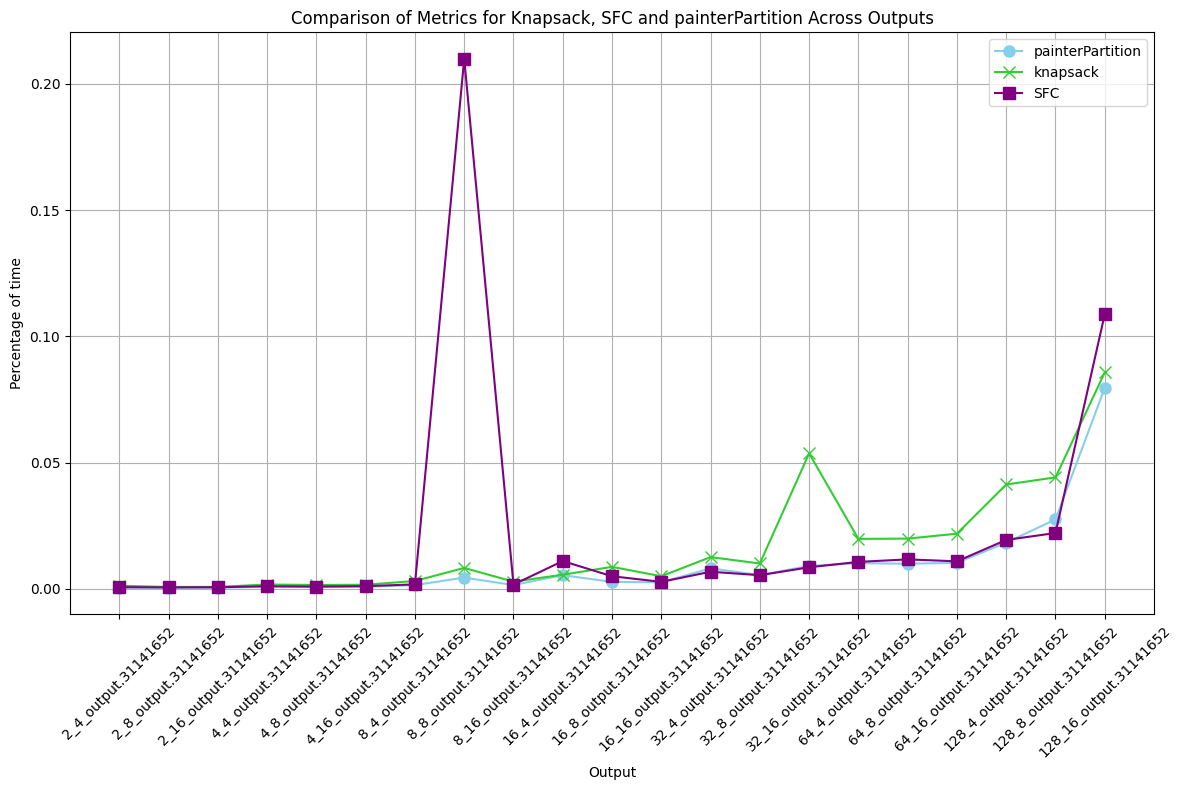

In [22]:


# Filter for 'painterPartition()'
painter_data = incl_data[incl_data['Name'] == 'painterPartition()'].copy()
painter_data.rename(columns={'Incl. Avg':'painter'},inplace=True)

# Filter for 'KnapSackDoIt()'
knapsack_data = incl_data[incl_data['Name'] == 'KnapSackDoIt()'].copy() 
knapsack_data.rename(columns={'Incl. Avg':'knapsack'},inplace=True)
# Filter for 'SFCProcessorMapDoIt()'
SFC_data = incl_data[incl_data['Name'] == 'SFCProcessorMapDoIt()'].copy()
SFC_data.rename(columns={'Incl. Avg':'SFC'},inplace=True)

# print(painter_data.shape)
# print(knapsack_data.shape)
# print(SFC_data.shape)
# print(painter_data.head())
# print(knapsack_data.head())

merged_df=pd.merge(painter_data,knapsack_data,on='Output',how='inner').merge(SFC_data,on='Output',how='inner').merge(eff_df,on='Output',how='inner')
result_df=merged_df[['Output','painter','knapsack','SFC','SFC_eff','knapsack_eff','painter_eff']]

# print(result_df)

def plot_main_metrics(main_data):
    plt.figure(figsize=(12, 8))

    plt.plot(main_data['Output'], main_data['painter'], marker='o', label='painterPartition', color='skyblue', markersize=8)
    plt.plot(main_data['Output'], main_data['knapsack'], marker='x', label='knapsack', color='limegreen', markersize=8)
    plt.plot(main_data['Output'], main_data['SFC'], marker='s', label='SFC', color='purple', markersize=8)
    # plt.plot(main_data['Output'], main_data['SFC_eff'], marker='>', label='SFC_eff', color='mediumpurple', markersize=8)
    # plt.plot(main_data['Output'], main_data['knapsack_eff'], marker='<', label='knapsack_eff', color='green', markersize=8)
    # plt.plot(main_data['Output'], main_data['painter_eff'], marker='*', label='painter_eff', color='blue', markersize=8)
   
    plt.title('Comparison of Metrics for Knapsack, SFC and painterPartition Across Outputs')
    plt.xlabel('Output')
    plt.ylabel('Percentage of time')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

  
    plt.show()

plot_main_metrics(result_df)

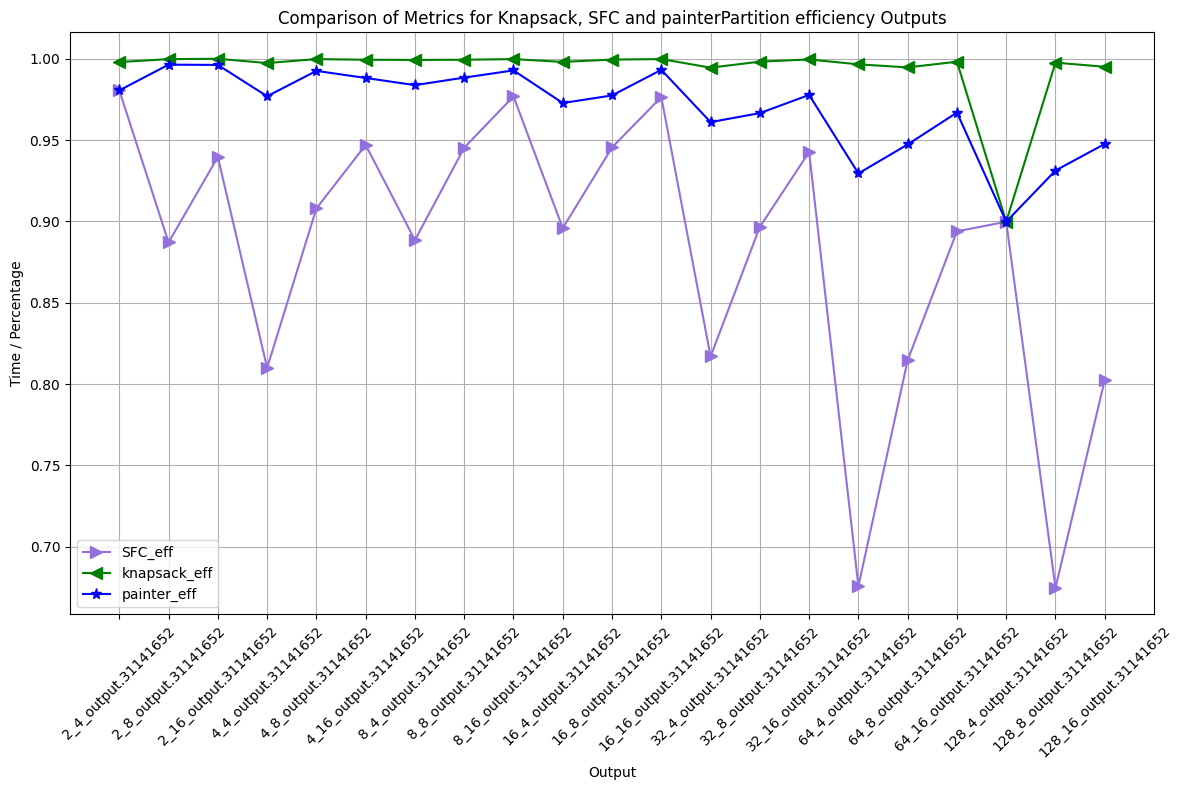

In [34]:

def plot_main_metrics(main_data):
    plt.figure(figsize=(12, 8))
    SFC_data=[float(sfc_eff) for sfc_eff in main_data['SFC_eff']]
    knapsack_data=[float(knapsack_eff) for knapsack_eff in main_data['knapsack_eff']]
    painter_data=[float(painter_eff) for painter_eff in main_data['painter_eff']]
    # plt.plot(main_data['Output'], main_data['painter'], marker='o', label='painterPartition', color='skyblue', markersize=8)
    # plt.plot(main_data['Output'], main_data['knapsack'], marker='x', label='knapsack', color='limegreen', markersize=8)
    # plt.plot(main_data['Output'], main_data['SFC'], marker='s', label='SFC', color='purple', markersize=8)
    plt.plot(main_data['Output'], SFC_data, marker='>', label='SFC_eff', color='mediumpurple', markersize=8)
    plt.plot(main_data['Output'], knapsack_data, marker='<', label='knapsack_eff', color='green', markersize=8)
    plt.plot(main_data['Output'], painter_data, marker='*', label='painter_eff', color='blue', markersize=8)
    # plt.bar(main_data['Output'], SFC_data,  label='SFC_eff', color='mediumpurple')
    # plt.bar(main_data['Output'], knapsack_data,  label='SFC_eff', color='blue')
    # plt.bar(main_data['Output'], painter_data,  label='SFC_eff', color='green')
    plt.title('Comparison of Metrics for Knapsack, SFC and painterPartition efficiency Outputs')
    plt.xlabel('Output')
    plt.ylabel('Time / Percentage')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

  
    plt.show()

plot_main_metrics(result_df)